# **titanic**

## **환경**

### 라이브러리

In [2]:
# 라이브러리 로드

import os
import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import missingno as msno
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

### 데이터

In [3]:
# 데이터 로드

path_train = '/home/sjt/space/github/kaggle/data/titanic/train.csv'
path_test = '/home/sjt/space/github/kaggle/data/titanic/test.csv'

path_gender_submission = '/home/sjt/space/github/kaggle/data/titanic/gender_submission.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_gender_submission = pd.read_csv(path_gender_submission)

## **각 변수 확인**

In [3]:
# 데이터 확인

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 데이터 갯수, 변수 갯수, 결측치 수, 데이터 타입, 메모리 사용량

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### note 1 변수 조사 

PassengerId = 승객 id

Survived = 생존 유무

Name = 승객 이름

Sex = 승객 성별

Age = 승객 나이

Ticket = 티켓 넘버

Pclass = Ticket class
    1 = 1st, 2 = 2nd, 3 = 3rd

SibSp = # of siblings / spouses aboard the Titanic
    타이타닉에 탄 형제,자매 수

Parch = # of parents / children aboard the Titanic	
    타이타닉에 탄 부모 수

Fare = Passenger fare
    요금

Cabin = Cabin number
    객실 넘버

Embarked = Port of Embarkation	
    C = Cherbourg, Q = Queenstown, S = Southampton
    

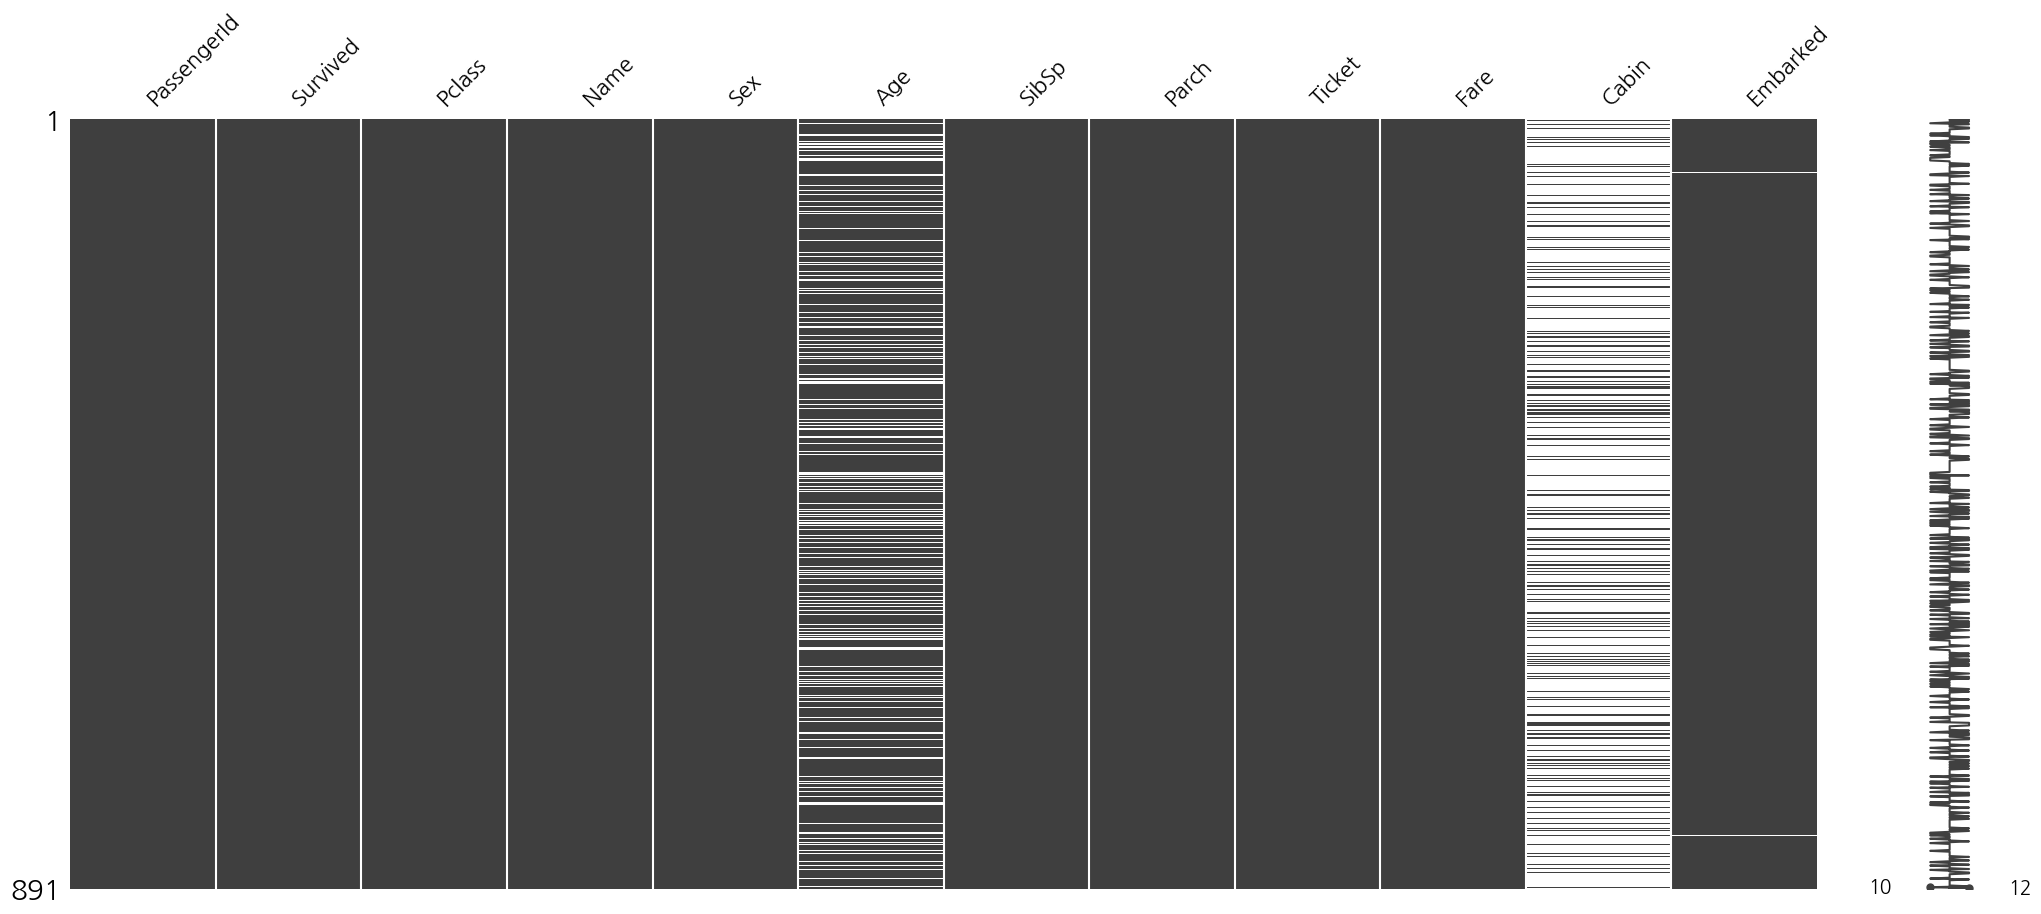

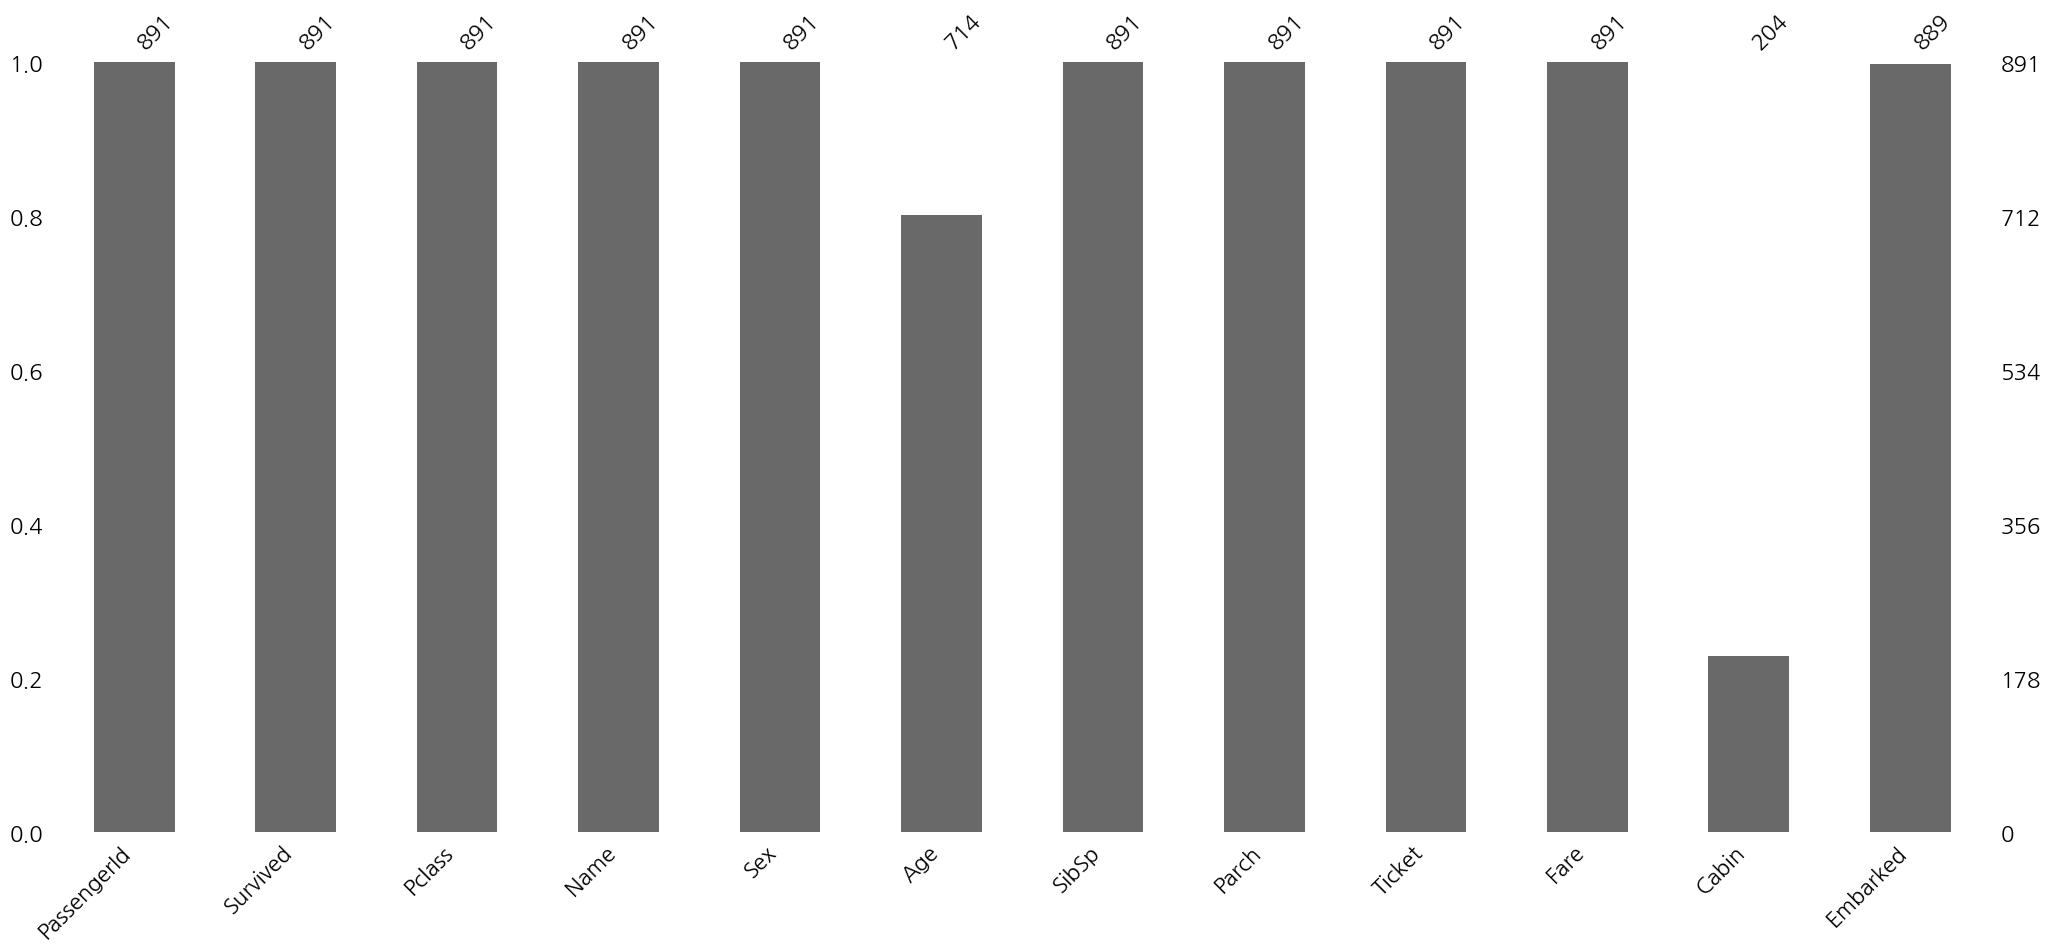

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
# 결측값 시각화
# 결측값 비율 확인

msno.matrix(df_train)
plt.show()

msno.bar(df_train)
plt.show()

df_train.isnull().sum() / len(df_train)

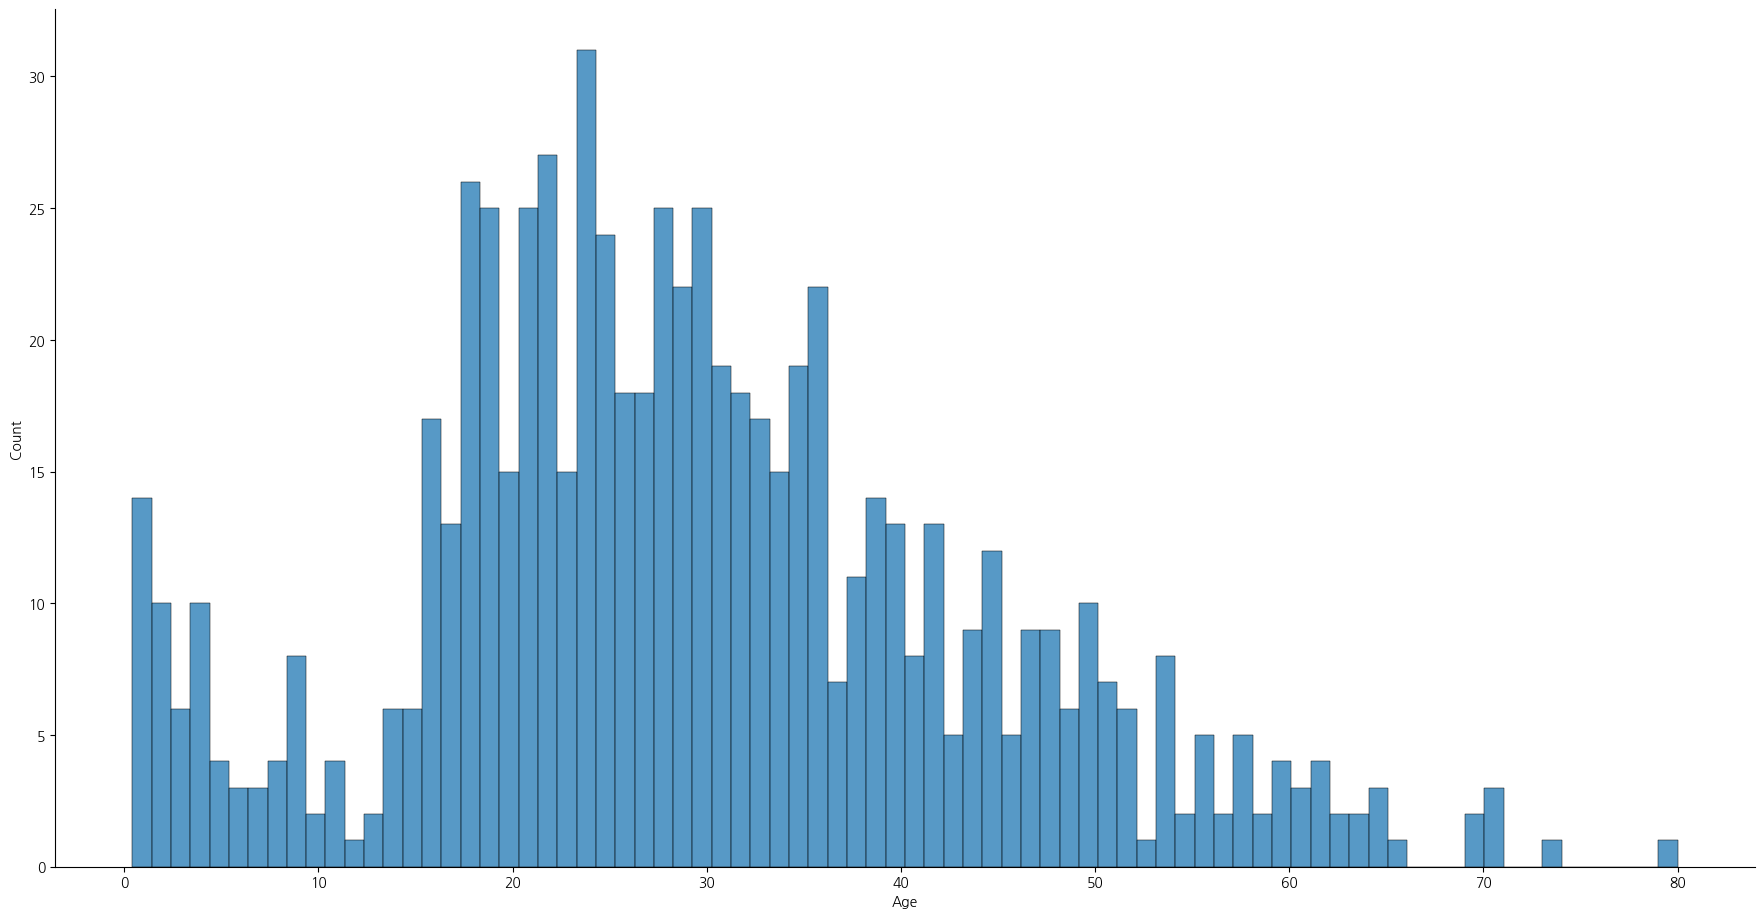

In [22]:
g = sns.displot(
    data = df_train,
    x = 'Age',
    binwidth=1
)

g.figure.set_size_inches(20, 10)

In [24]:
Counter(df_train['Cabin'])

Counter({nan: 687,
         'G6': 4,
         'C23 C25 C27': 4,
         'B96 B98': 4,
         'F33': 3,
         'E101': 3,
         'F2': 3,
         'D': 3,
         'C22 C26': 3,
         'C123': 2,
         'D33': 2,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F G73': 2,
         'D26': 2,
         'B58 B60': 2,
         'C2': 2,
         'E33': 2,
         'F4': 2,
         'D36': 2,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'B77': 2,
         'E67': 2,
         'C125': 2,
         'B49': 2,
         'C65': 2,
         'B57 B59 B63 B66': 2,
         'B18': 2,
         'C124': 2,
         'B35': 2,
         'E44': 2,
         'C92': 2,
         'D20': 2,
         'E25': 2,
         'B22': 2,
         'C68': 2,
         'C126': 2,
         'B51 B53 B55': 2,
         'B5': 2,
         'B20': 2,
         'E24': 2,
         'E8': 2,
         'E121': 2,
         'D17': 2,
         'C85': 1,
         'E46': 1,
         'C103': 1,
         

### note 2 결측치 처리 계획

제거
대치
보간
다중 대치

모두 시도해본다.

Age, Cabin, Embarked 에서 결측치 발견

Age = 승객 나이 
    예상
    예상으로는 예측 목표가 생존이라, 나이가 많이 중요하면, 평균값을 했다가 오히려 결과가 안 좋을 수도 있을거라 생각한다.
    나이를 예측하여, 채운 뒤 예측하는 것이 좋을거라 예상한다.

Cabin = Cabin number 객실 넘버
    예상
    결측치가 데이터의 절반이 넘게 있어서, 변수자체를 제거하는 것이 가장 좋은 예측을 할 것 같다

Embarked = Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
    예상
    승선지가 다른 변수랑 관련이 있을 것 같다. 그러나 양이 너무 작아서 결측치 행만 제거해도 좋을 것 같다

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 결측치 처리 데이터 1

In [4]:
# 결측치 처리 데이터
# Age 행 제거, Cabin 컬럼 제거, Embarked 행 제거

사용할변수 = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked'
]

m_Age = df_train['Age'].notna()
m_Embarked = df_train['Embarked'].notna()

m = m_Age & m_Embarked

df_train_결측치처리1 = df_train[m][사용할변수]
df_train_결측치처리1_예측값 = df_train[m]['Survived']

ohe = OneHotEncoder(sparse_output=False)
ohe_Pclass = ohe.fit_transform(df_train_결측치처리1[['Pclass']])
ohe_Pclass = pd.DataFrame(ohe_Pclass, columns=ohe.get_feature_names_out(), index=df_train_결측치처리1.index)

ohe = OneHotEncoder(sparse_output=False)
ohe_Sex = ohe.fit_transform(df_train_결측치처리1[['Sex']])
ohe_Sex = pd.DataFrame(ohe_Sex, columns=ohe.get_feature_names_out(), index=df_train_결측치처리1.index)

ohe = OneHotEncoder(sparse_output=False)
ohe_Embarked = ohe.fit_transform(df_train_결측치처리1[['Embarked']])
ohe_Embarked = pd.DataFrame(ohe_Embarked, columns=ohe.get_feature_names_out(), index=df_train_결측치처리1.index)

df_train_결측치처리1 = pd.concat([df_train_결측치처리1[['Age', 'SibSp', 'Parch', 'Fare']], ohe_Pclass, ohe_Sex, ohe_Embarked], axis=1)
df_train_결측치처리1

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
886,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,19.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 결측치 처리 데이터 1 랜덤포레스트

In [27]:
# 학습, 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(df_train_결측치처리1, df_train_결측치처리1_예측값, test_size=0.33, shuffle=True, random_state=42)

In [67]:
# 랜덤 포레스트 모델 학습

model_rf = RandomForestClassifier(
    n_estimators=450,
    max_depth=5,
    random_state=0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=450, random_state=0)

In [68]:
# 테스트 데이터 예측

predict = model_rf.predict(X_test)

In [69]:
# 예측 평가

accuracy_score(y_test, predict)

0.8042553191489362

<Axes: ylabel='None'>

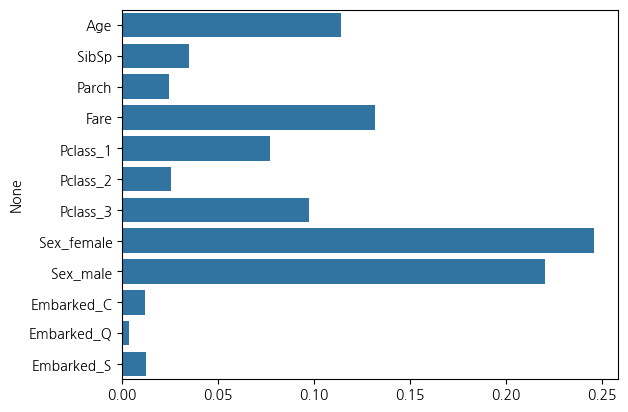

In [70]:
# 랜덤 포레스트 변수 중요도

sns.barplot(
    x=clf.feature_importances_,
    y=X_test.columns
)

In [9]:
# 성 이름
Counter([i.split(' ')[-1] if len(i.split(' ')) > 1 else i for i in df_train['Name']])

Counter({'John': 16,
         'Henry': 15,
         'William': 15,
         'James': 14,
         'Jr': 9,
         'George': 8,
         'Mary': 8,
         'J': 7,
         'Charles': 7,
         'Alfred': 7,
         'Edward': 7,
         'H': 6,
         'Joseph': 6,
         'Martin': 6,
         'Sofia': 6,
         'Leonard': 5,
         'Elizabeth': 5,
         'Johan': 5,
         'Alexander': 5,
         'Victor': 5,
         'Samuel': 5,
         'Arthur': 5,
         'Ivan': 4,
         'Bertha': 4,
         'Patrick': 4,
         'Anna': 4,
         'Thomas': 4,
         'Richard': 4,
         'E': 3,
         'Maria': 3,
         'Delia': 3,
         'Frederick': 3,
         'Emil': 3,
         'Robert': 3,
         'David': 3,
         'Ernest': 3,
         'Elsie': 3,
         'Tannous': 3,
         'Peter': 3,
         'Olof': 3,
         'Michael': 3,
         '': 2,
         'Eugene': 2,
         'Lawrence': 2,
         '"Nellie"': 2,
         'Lalio': 2,
         'H